In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import mlcrate as mlc
import skimage
from skimage import io

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('./data/train/kaggletrain.csv')

200004148_00027_2
[('U+4E00', 883, 864), ('U+3078', 1738, 1740), ('U+3070', 884, 2469), ('U+304B', 735, 1627), ('U+304C', 603, 639), ('U+306F', 1631, 1570), ('U+306F', 439, 2000), ('U+306F', 1746, 1347), ('U+3078', 735, 1662), ('U+309D', 1478, 1544), ('U+3044', 1631, 2086), ('U+306F', 585, 412), ('U+304C', 300, 1500), ('U+308A', 1336, 2632), ('U+308B', 1031, 515), ('U+3064', 1473, 1501), ('U+309D', 1628, 1020), ('U+309D', 583, 2285), ('U+306F', 1323, 690), ('U+304B', 1183, 911), ('U+304B', 1484, 1738), ('U+3065', 1749, 593), ('U+306F', 1632, 1923), ('U+3044', 587, 1957), ('U+306B', 1629, 646), ('U+3051', 882, 2347), ('U+3044', 436, 2356), ('U+306E', 882, 1696), ('U+304C', 304, 349), ('U+3078', 439, 2405), ('U+3053', 287, 1092), ('U+309D', 579, 848), ('U+51FA', 1751, 363), ('U+306B', 1329, 2410), ('U+306F', 1626, 978), ('U+304B', 1183, 2366), ('U+3044', 280, 633), ('U+306B', 1744, 1614), ('U+309D', 1027, 563), ('U+3079', 446, 519), ('U+306B', 1032, 989), ('U+306B', 1479, 2297), ('U+304A

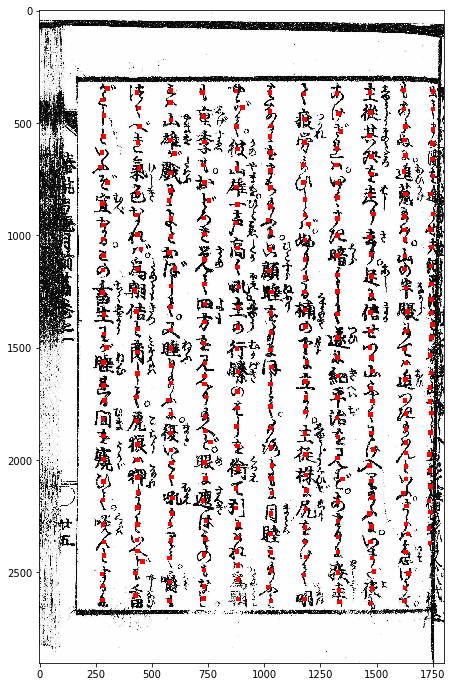

[274, 280, 281, 282, 282, 282, 283, 284, 284, 284, 284, 285, 285, 286, 286, 286, 286, 287, 287, 287, 287, 288, 289, 289, 289, 290, 292, 300, 304, 305, 426, 429, 429, 433, 433, 433, 434, 435, 436, 437, 437, 437, 437, 438, 438, 438, 438, 439, 439, 439, 440, 440, 441, 445, 445, 446, 453, 460, 576, 579, 580, 581, 581, 582, 583, 584, 585, 585, 585, 585, 585, 586, 586, 586, 586, 587, 587, 587, 587, 587, 588, 588, 588, 590, 590, 591, 594, 603, 605, 728, 730, 730, 731, 731, 731, 733, 733, 733, 734, 735, 735, 735, 735, 735, 736, 736, 737, 737, 738, 738, 738, 740, 740, 741, 742, 743, 757, 763, 875, 876, 876, 877, 879, 879, 879, 880, 881, 881, 882, 882, 882, 882, 882, 883, 883, 883, 884, 884, 884, 884, 885, 886, 886, 888, 890, 906, 1019, 1021, 1026, 1027, 1027, 1028, 1028, 1029, 1029, 1029, 1030, 1030, 1030, 1030, 1030, 1031, 1031, 1031, 1032, 1032, 1032, 1032, 1032, 1032, 1032, 1033, 1034, 1035, 1036, 1037, 1176, 1177, 1179, 1179, 1180, 1180, 1181, 1181, 1182, 1182, 1183, 1183, 1183, 1183, 1183,

In [4]:

df_train = df_train[1005:]

for img, labels in df_train.values:
    if type(labels) == float:
        continue
    chars = []
    for unic, x, y, w, h in np.array(labels.split()).reshape(-1, 5):
        chars.append((unic, int(int(x)+int(w)/2), int(int(y)+int(h)/2)))
    print(img)
    print(chars)
    img = io.imread('./data/train/train/{}.jpg'.format(img))
    
    for unic, x, y in chars:
        img[y-10:y+10, x-10:x+10, :] = [255, 0, 0]
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.show()
    print(sorted([x[1] for x in chars]))
    break

In [5]:
density = np.zeros(img.shape[1])

In [6]:
width = img.shape[1] // 50
for x in [x[1] for x in chars]:
    density[x-width:x+width] += 1

In [7]:
columns = []
col = None
for ptr in range(len(density)):
    height = density[ptr]
    if col is None and height > 0:
        col = ptr
    if col and height == 0:
        columns.append((col, ptr, []))
        col = None

In [8]:
chars = sorted(chars, key=lambda x: x[2])
for char, x, y in chars:
    for i, (left, right, _) in enumerate(columns):
        if x < right:
            columns[i][2].append((char, x, y))
            break

In [9]:
from skimage import draw

char_order = []
lines = []

for _, _, chars in columns[::-1]:
    char_order.extend(chars)
    
for p1, p2 in zip(char_order[1:], char_order[:-1]):
    print(p1, p2)
    lines.append(draw.line(*p1[1:], *p2[1:]))

('U+3066', 1751, 440) ('U+51FA', 1751, 363)
('U+307E', 1753, 532) ('U+3066', 1751, 440)
('U+3065', 1749, 593) ('U+307E', 1753, 532)
('U+6E6F', 1749, 662) ('U+3065', 1749, 593)
('U+3092', 1751, 737) ('U+6E6F', 1749, 662)
('U+9032', 1743, 819) ('U+3092', 1751, 737)
('U+3089', 1751, 907) ('U+9032', 1743, 819)
('U+305B', 1741, 975) ('U+3089', 1751, 907)
('U+592B', 1745, 1053) ('U+305B', 1741, 975)
('U+7D00', 1744, 1137) ('U+592B', 1745, 1053)
('U+5E73', 1746, 1218) ('U+7D00', 1744, 1137)
('U+6CBB', 1745, 1288) ('U+5E73', 1746, 1218)
('U+306F', 1746, 1347) ('U+6CBB', 1745, 1288)
('U+3053', 1750, 1399) ('U+306F', 1746, 1347)
('U+306E', 1746, 1457) ('U+3053', 1750, 1399)
('U+6681', 1739, 1537) ('U+306E', 1746, 1457)
('U+306B', 1744, 1614) ('U+6681', 1739, 1537)
('U+5C71', 1739, 1678) ('U+306B', 1744, 1614)
('U+3078', 1738, 1740) ('U+5C71', 1739, 1678)
('U+3068', 1746, 1792) ('U+3078', 1738, 1740)
('U+3066', 1742, 1878) ('U+3068', 1746, 1792)
('U+51FA', 1737, 1977) ('U+3066', 1742, 1878)
('U+3

In [10]:
for line in lines:
    img[line[1], line[0], :] = [255, 0, 0]

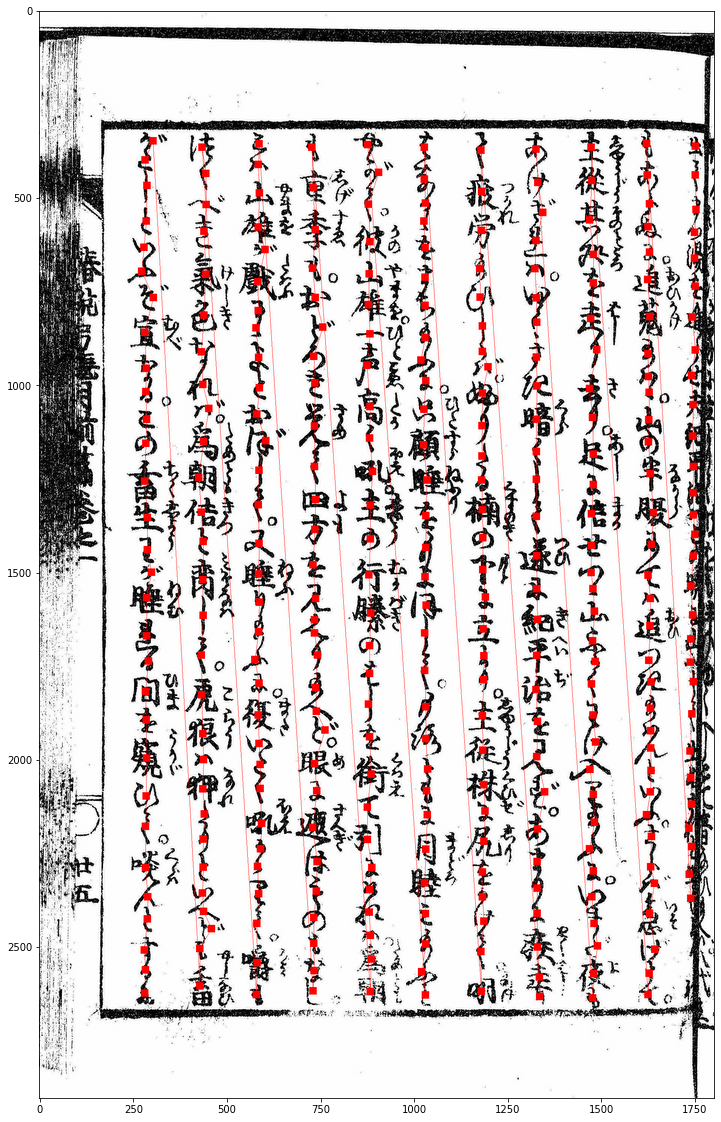

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(img, interpolation='lanczos')
plt.show()

In [12]:
def transcribe(img, chars, draw=False):
    if draw:
        img = img.copy()
        
        for unic, x, y in chars:
            img[y-10:y+10, x-10:x+10, :] = [255, 0, 0]
        
    density = np.zeros(img.shape[1])
    
    width = img.shape[1] // 50
    for x in [x[1] for x in chars]:
        density[x-width:x+width] += 1
        
    columns = []
    col = None
    for ptr in range(len(density)):
        height = density[ptr]
        if col is None and height > 0:
            col = ptr
        if col and height == 0:
            columns.append((col, ptr, []))
            col = None
            
    chars = sorted(chars, key=lambda x: x[2])
    for char, x, y in chars:
        for i, (left, right, _) in enumerate(columns):
            if x < right:
                columns[i][2].append((char, x, y))
                break
                
#     print(columns)
    output = ''
    for _, _, chars in columns[::-1]:
        for unicode, _, _ in chars:
            char = chr(int(unicode[2:], 16))
            output += char
#         output += '\n'
        
    if draw:
        char_order = []
        lines = []
        for _, _, chars in columns[::-1]:
            char_order.extend(chars)

        import skimage.draw as skdraw
        for p1, p2 in zip(char_order[1:], char_order[:-1]):
            lines.append(skdraw.line(*p1[1:], *p2[1:]))
            lines.append(skdraw.line(p1[1]+1, p1[2]+1, p2[1]+1, p2[2]+1))
            lines.append(skdraw.line(p1[1]-1, p1[2]-1, p2[1]-1, p2[2]-1))
        for line in lines:
            img[line[1], line[0], :] = [255, 0, 0]
            
        return output.strip(), img

    return output.strip()

In [13]:
import editdistance

In [14]:
swapdata = pd.read_csv('./itaijiswapdata.csv')
swaps = {}
for a, b in swapdata.values[:, 2:]:
    swaps[a] = b

In [15]:
import glob
textfiles = glob.glob('./text/*.txt')
textfiles

[]

In [16]:
gt = {}
for f in textfiles:
    print(f)
    try:
        text = open(f,'rb').read().decode('utf-8').split('\n')
    except UnicodeDecodeError:
        print('skipping')
        continue
        
    working = ''
    img = None
    for line in text:
        if line.startswith('<Image'):
            if img is not None:
                gt[img] = working
                working = ''
            img = line.strip()[7:-5]
            print(img)
        elif len(line) > 0:
            working += line

In [17]:
len(gt)

0

In [18]:
ds = []
for fn, labels in df_train.values:
    if fn not in gt:
        continue
    if type(labels) == float:
        continue
    chars = []
    for unic, x, y, w, h in np.array(labels.split()).reshape(-1, 5):
        chars.append((unic, int(int(x)+int(w)/2), int(int(y)+int(h)/2)))
        
    actual = gt[fn]
    for a,b in swaps.items():
        actual = actual.replace(a, b)

    print(fn)
    img = io.imread('./input/train_images/{}.jpg'.format(fn))
    
    output, img = transcribe(img, chars, draw=True)
    
#     plt.figure(figsize=(18, 18))
#     plt.imshow(img, interpolation='lanczos')
#     plt.show()
    
    print(output)
    print(gt[fn])
    if sorted(output.strip()) == sorted(actual.strip()):
        distance = editdistance.eval(output.strip(), actual.strip()) / len(actual)
        print(distance)
        ds.append(distance)
    else:
        print('discrepancy')

In [19]:
(np.array(ds) == 0).mean()

nan